# Simulated Annealing and Leaves
--------------

Run Simulated Annealing with Monte Carlo move consisting of: 
* pick a random floppy variable
* grow a seaweed
* flip all variables touched by the seaweed

**Goal**: see whether we get better results with graphs with more leaves

In [37]:
using Printf, Plots
include("../code/headers.jl")
include("../code/SimulationNEW.jl")

With graph size $n=1000$, expose leaves via $b$-reduction with $b \in [1, 3, 5, 10, 20, 50, 100, 200]$.

_Note_ : the number of factors $m$ is always the same! If for example $b=4$, a graph with $m+4$ factors is built, then $4$ are removed.

Run compression over `niter` random {graph, source vector} instances

In [29]:
q = 2
n = 1000
m = 400
bvals = [1, 3, 5, 10, 20, 50, 100, 200]
niter = 100
randseed = 1234;

Cooling schedule for Simulated Annealing: $\beta_{overlap} \in [10^{-1}, 10^0, 10^1]$

In [39]:
sims = Vector{Simulation{SA}}(undef, length(bvals))
sa = SA(mc_move=MetropSmallJumps(), nsamples=100, betas=[Inf 0.1; Inf 1.0; Inf 10.0;]);

In [ ]:
time_SA = @timed for (i,b) in enumerate(bvals)
    println("##### b=$b. $i of $(length(bvals)) #####")
    sims[i] = Simulation(q, n, m, sa, b=b, niter=niter, verbose=true, randseed=randseed+i, showprogress=false)
end

In [8]:
println("Runtime for simulated annealing: ", Int(round(time_SA.time)), "s")

Runtime for simulated annealing: 7453s


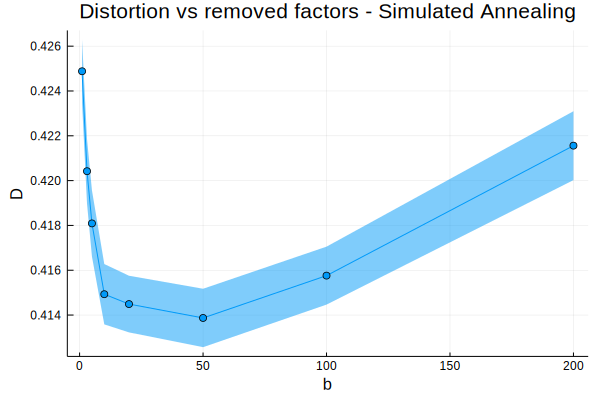

In [26]:
dist = distortion.(sims)
avg_dist = mean.(dist)
sd_dist = std.(dist) ./ sqrt(niter)
pl = Plots.plot(bvals, avg_dist, xlabel="b", ylabel="D", label="", ribbon=sd_dist, marker=:circle)
title!("Distortion vs removed factors - Simulated Annealing")

$b$-reduction seems to indeed have some effect

## Compare with Max-sum

Run Max-sum on the same graphs and observe differences

In [10]:
sims_ms = Vector{Simulation{MS}}(undef, length(bvals))
ms = MS(maxiter=200, gamma=5e-3);

In [ ]:
for (i,b) in enumerate(bvals)
    println("##### b=$b. $i of $(length(bvals)) #####")
    sims_ms[i] = Simulation(q,n,m,ms,b=b, niter=niter, verbose=true, randseed=randseed+i, showprogress=true)
end

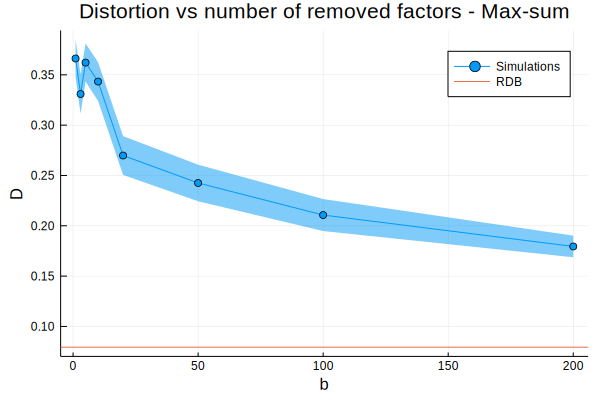

In [24]:
dist_ms = distortion.(sims_ms)
avg_dist_ms = mean.(dist_ms)
sd_dist_ms = std.(dist_ms) ./ sqrt(niter)
bound = rdbinv(1-m/n)
Plots.plot(bvals, avg_dist_ms, xlabel="b", ylabel="D", label="Simulations", ribbon=sd_dist_ms, marker=:circle)
Plots.hline!([bound], label="RDB")
title!("Distortion vs number of removed factors - Max-sum")